In [52]:
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [119]:
patterns = np.array([
    [1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1],
    [-1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1],
    [1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1],
    [1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1],
    [1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1],
    [1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
    [1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1],
    [1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1],
])

weights = np.full((8, 8), -0.125)
np.fill_diagonal(weights, 1)

print(weights)

[[ 1.    -0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125  1.    -0.125 -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125  1.    -0.125 -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125  1.    -0.125 -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125  1.    -0.125 -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125  1.    -0.125 -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125  1.    -0.125]
 [-0.125 -0.125 -0.125 -0.125 -0.125 -0.125 -0.125  1.   ]]


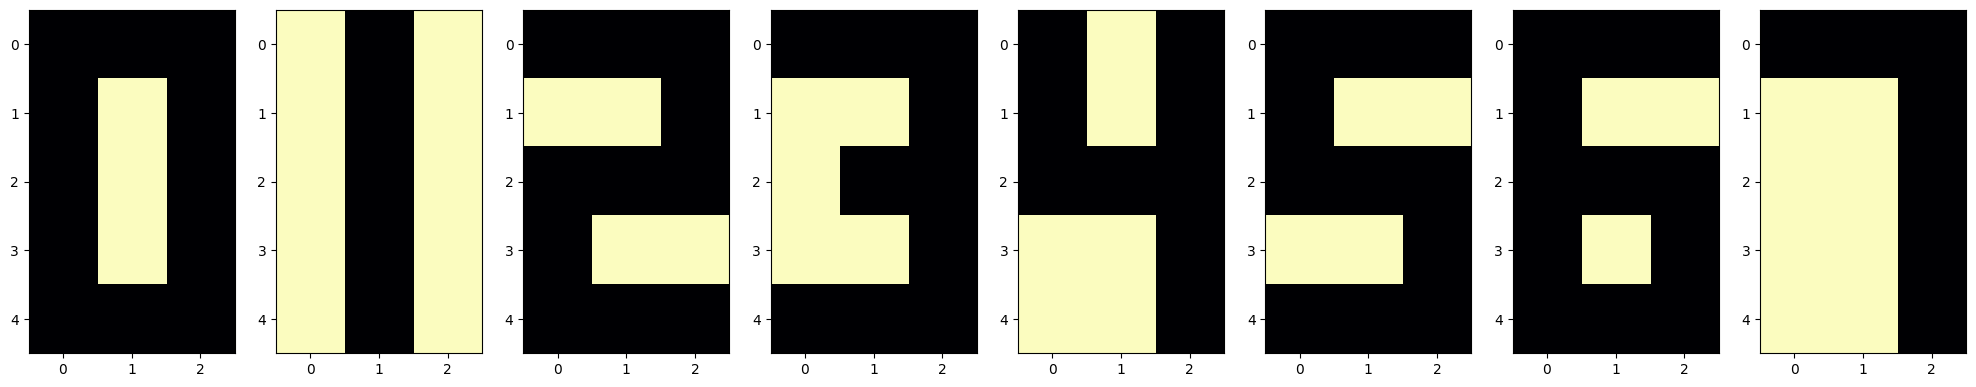

In [120]:
fig, axs = plt.subplots(1, 8, figsize=(25, 10))

for i in range(8):
    axs[i].imshow(patterns[i].reshape(5, 3), cmap='magma_r')

plt.show()


In [133]:
def classify(patterns, weights, input_pattern):
    iter = 0
    S = np.dot(patterns, input_pattern)
    Fs = S / len(input_pattern)

    r = np.ones(len(input_pattern))

    while np.count_nonzero(r) > 1:
        r = np.dot(weights, Fs)
        for i in range(8):  # len(r)
            if r[i] < 0:
                r[i] = 0
        iter += 1
        Fs = r

    output = r

    for i in range(8):
        if output[i] > 0:
            win_index = i
            break
            
    winner = patterns[win_index]
    return winner, iter


In [145]:
def classifyArray(patterns, patterns_int, weights, input_patterns):
    fig, axs = plt.subplots(2, len(input_patterns), figsize=(len(input_patterns)*5, 10))
    list = []
    
    for i, input in enumerate(input_patterns):
        winner, iter = classify(patterns, weights, input)

        list.append(winner)

        axs[0][i].imshow(input.reshape(5, 3), cmap='magma_r')
        axs[0][i].set_title(f"Given number: {patterns_int[i]}", fontsize=20)
        axs[1][i].imshow(winner.reshape(5, 3), cmap='magma_r')
        axs[1][i].set_title(f"Iteration: {iter}", fontsize=20)

    results = np.array(list)

    return plt, results


<function matplotlib.pyplot.show(close=None, block=None)>

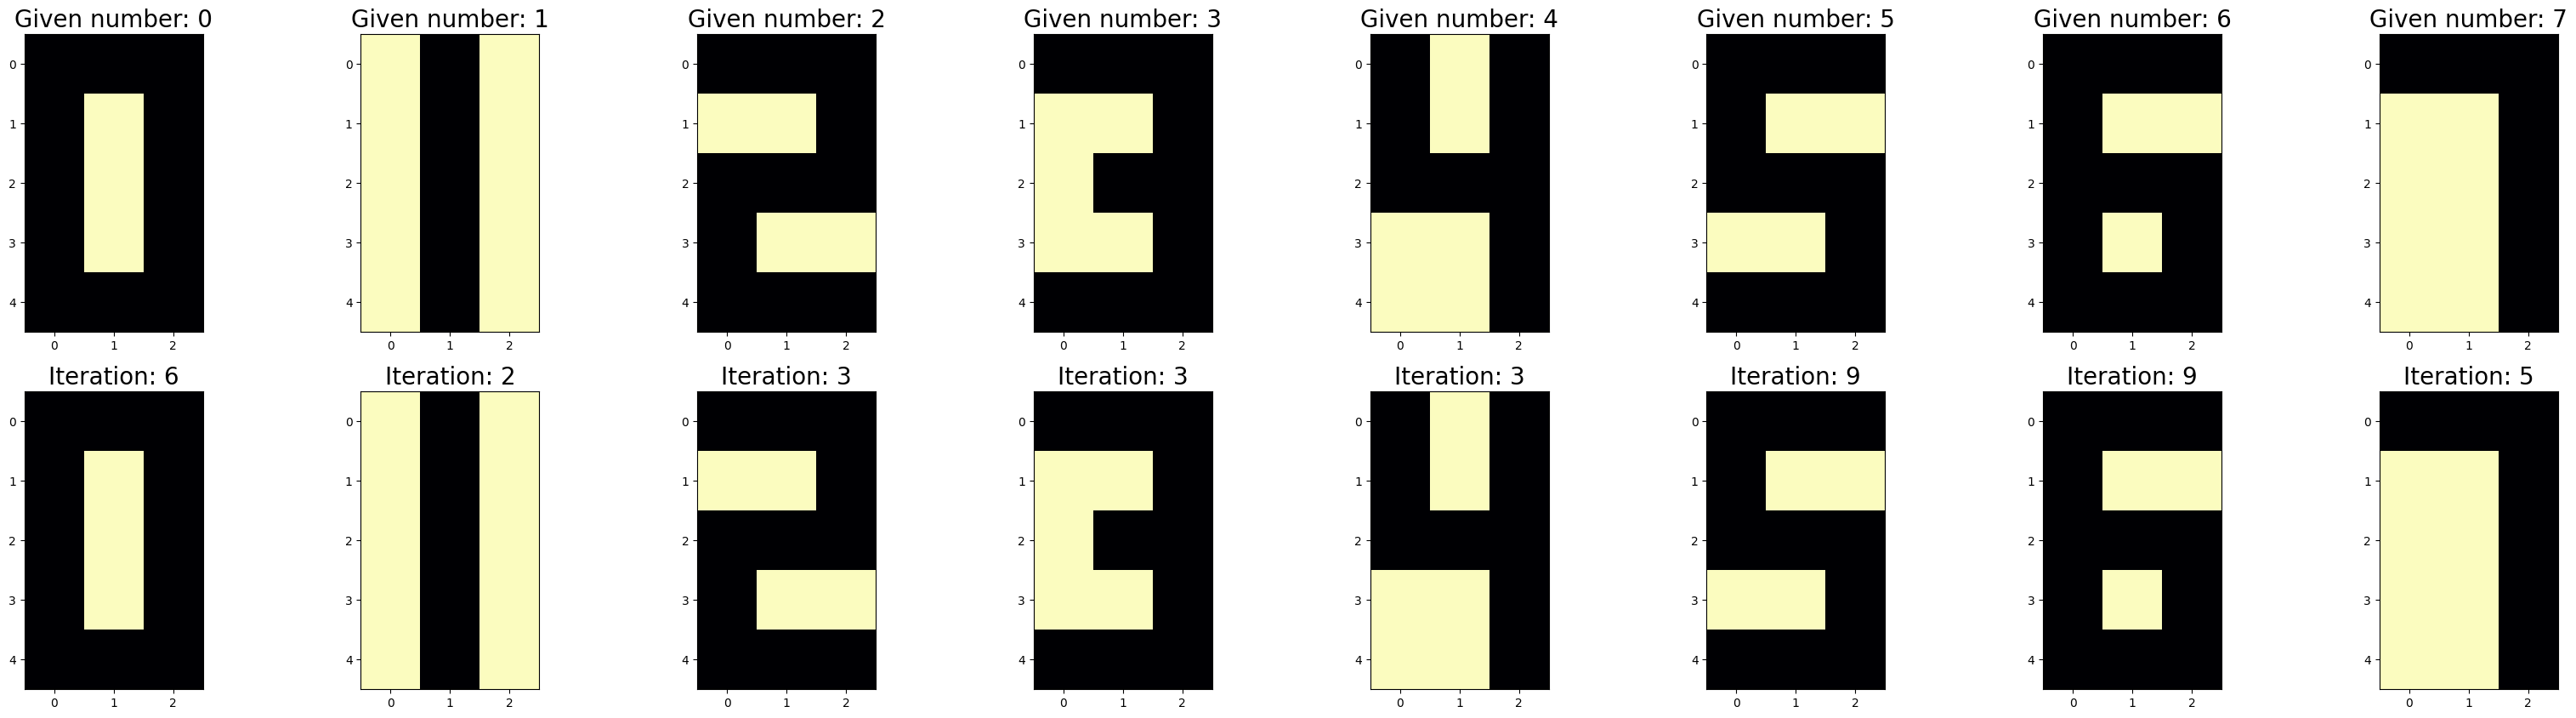

In [146]:
plt, results = classifyArray(patterns, [0, 1, 2, 3, 4, 5, 6, 7, 8], weights, patterns)
plt.show

In [150]:
def addNoise(patterns, num):
    for p in patterns:
        for i in range(num):
            index = randrange(len(p))
            if (p[index] > 0):
                p[index] = -1
            else:
                p[index] = 1


<function matplotlib.pyplot.show(close=None, block=None)>

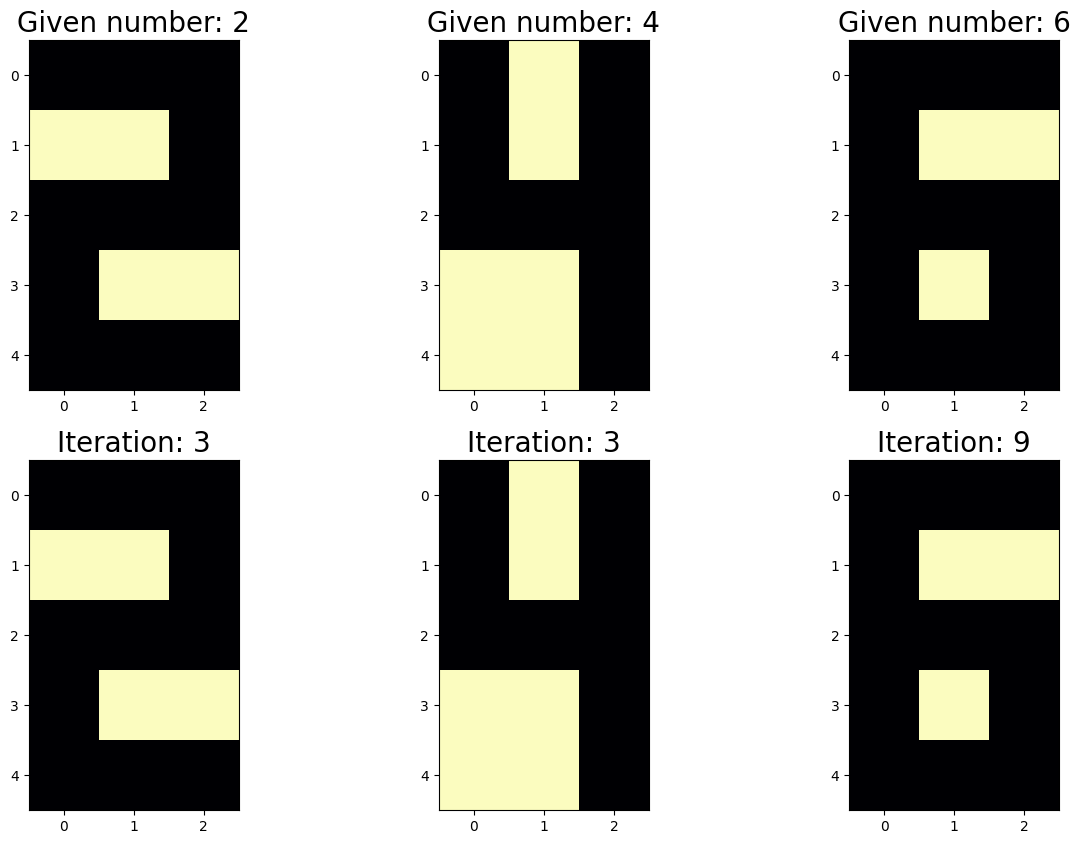

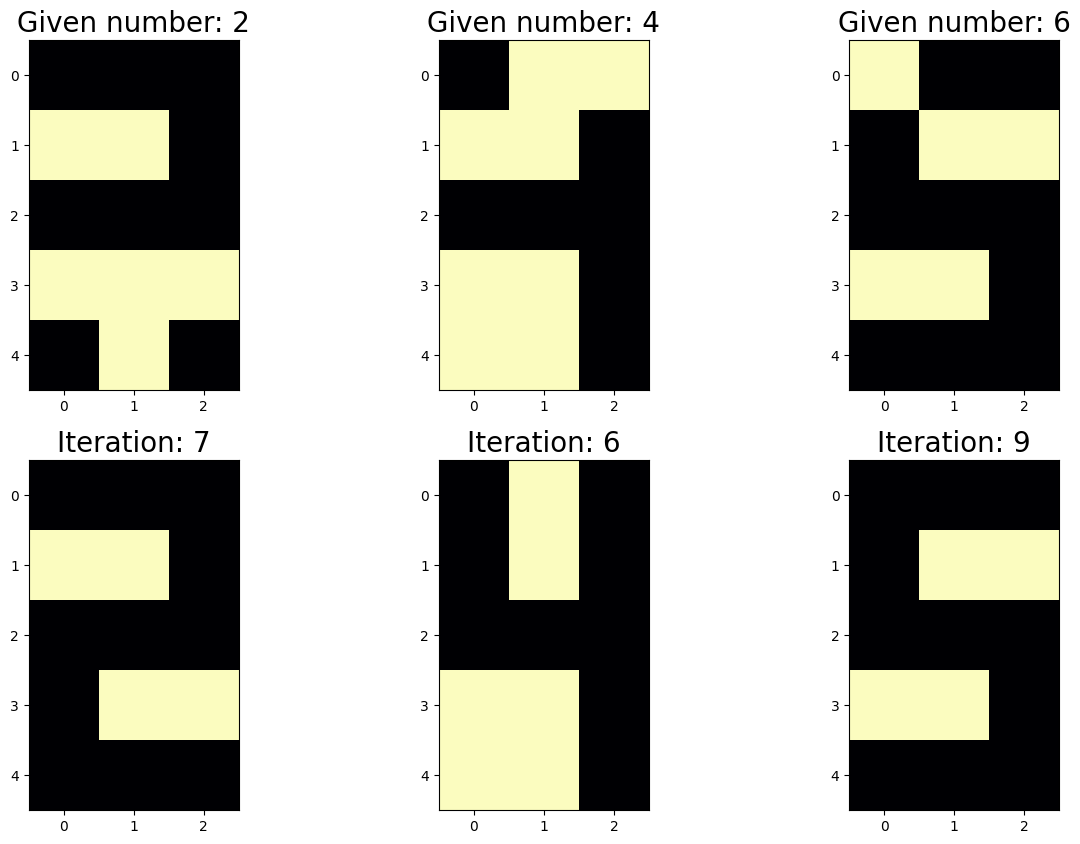

In [154]:
input_patterns = np.array(
    [[1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1],  # 2
     [1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1],  # 4
     [1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1]])  # 6

plt, results = classifyArray(patterns, [2, 4, 6], weights, input_patterns)
plt.show

addNoise(input_patterns, 2)

plt, results = classifyArray(patterns, [2, 4, 6], weights, input_patterns)
plt.show
